In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Loading the data
data = pd.read_csv('16.csv')

data.head()

,x1,x2,y
0,-0.003377,0.239447,6.815617
1,0.046785,1.770006,41.741575
2,0.513727,0.671773,47.424775
3,0.915436,-0.911390,26.248493
4,0.290191,0.197485,17.664391


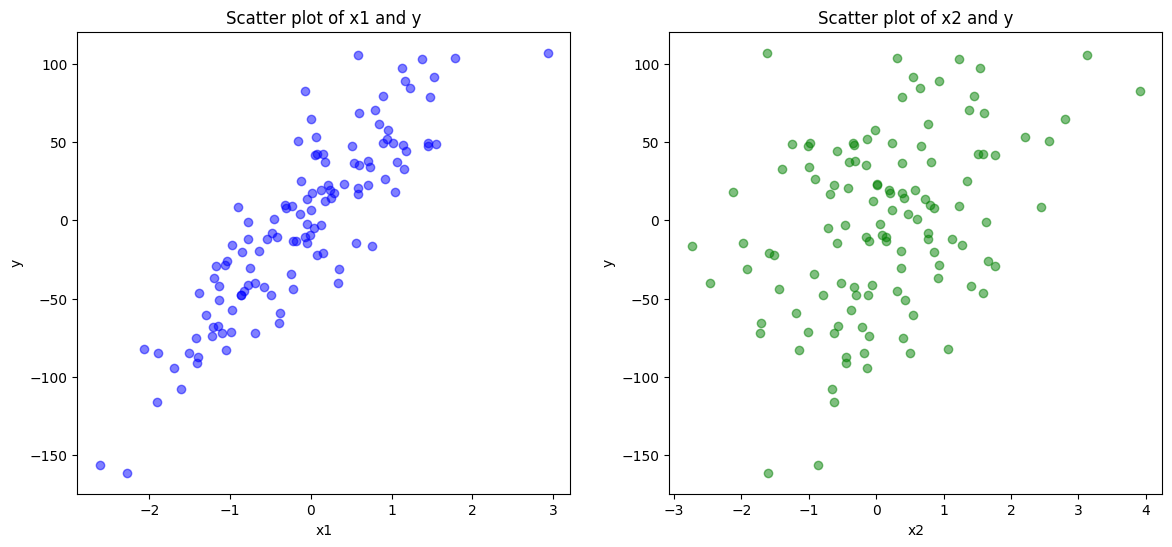

In [4]:
# Scatter plots for x1 and y, and for x2 and y
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(data['x1'], data['y'], color='blue', alpha=0.5)
ax[0].set_title('Scatter plot of x1 and y')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')

ax[1].scatter(data['x2'], data['y'], color='green', alpha=0.5)
ax[1].set_title('Scatter plot of x2 and y')
ax[1].set_xlabel('x2')
ax[1].set_ylabel('y')

plt.show()

The scatter plots illustrate the relationship between the independent variables x1, x2 and the dependent variable y.

Based on the scatter plots, none of the variables seem to have a linear relationship with the target variable y. This suggests that a simple linear regression model with an equation in the form:

y = b + m1 * x1 + m2 * x2

May not fit the data well. We could potentially try other types of models (such as polynomial regression, etc.) that could capture the non-linearity of the data.

Let's form the train and test datasets now. In this instance, we can use 70% of the data for training the model and 30% for testing. This is a common split for train/test data, but the specific values can be adjusted depending on the size and specifics of the dataset at hand. 

It is advisable to use sklearn's train_test_split function as it randomizes the observations before splitting the data, which helps in avoiding any bias in the model that could result from some sort of ordering in the data. 

Let's set up the features (X) and target (y) variables and then split the data.

In [5]:
# Set up the features (X) and the target (y)
X = data[['x1', 'x2']]
y = data['y']

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((84, 2), (36, 2), (84,), (36,))

The dataset is split into training and testing sets. The training data is set up with 84 records, while the test data has 36 records. Both training and test data contain 2 features (`x1` and `x2`). 

The next step is to use ordinary least squares (OLS) to estimate the parameters of the Linear Regression model. This method minimizes the sum of the squares of the differences between the observed and predicted values. 

Let's fit a Linear Regression model to the training data and check its coefficients. This will give us an equation of the form `y = b + m1 * x1 + m2 * x2`. Here `b` is the constant, `m1` is the coefficient for `x1`, and `m2` is the coefficient for `x2`.

In [6]:
# Instantiate and fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients of the Linear Regression model
model.intercept_, model.coef_

(0.933635690393098, array([53.14857316, 22.63577388]))

The Linear Regression model has been trained on the data and the coefficients have been computed. So, the equation of our current regression model is:

y = 0.93 + 53.15 * x1 + 22.64 * x2

Now, let's write a function to estimate the parameters of the model using the gradient descent method. Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

Let's then use this function to estimate the coefficients. Afterward, we'll use the trained model to predict the values on the test data and then compute the model's Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and Coefficient of Determination (R^2 Score). These metrics will help us to evaluate the quality of the model.

Finally, we will compute the predictive value of the dependent feature given the values of independent features. Let's start by writing the gradient descent function. We will then use it to estimate the model parameters.

In [7]:
# Function to normalize features
# Normalization is necessary for gradient descent to ensure all features are on a similar scale
# and the algorithm converges faster

def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

# Function for the Gradient Descent algorithm

import scipy as sp

def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    alpha: learning rate
    num_iters: number of iterations
    '''
    m = len(y) # number of training examples
    J_history = sp.zeros(num_iters)

    for i in range(num_iters):
        hypothesis = np.dot(X, theta)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, hypothesis-y)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

# Function to compute cost

def compute_cost(X, y, theta):
    '''
    Compute cost for linear regression
    '''
    m = len(y) # number of training examples

    # Calculate the hypothesis
    h = np.dot(X, theta)

    # Calculate loss using squared error
    loss = h - y
    cost = np.sum(loss ** 2) / (2 * m)
    return cost

# Normalize features
X_norm, mu, sigma = normalize_features(X_train)

# Add a column of ones to X (interception data)
m = len(y_train) # number of training examples
X_padded = np.column_stack((np.ones((m, 1)), X_norm))

# Initialize Theta to zero
t_theta = np.zeros((3, 1))

# Run gradient descent
t_theta, J_history = gradient_descent(X_padded, y_train[:, np.newaxis], t_theta, 0.1, 500)

# print theta
print(t_theta)

[[-1.15473734]
 [52.7353594 ]
 [27.50944889]]
/tmp/ipykernel_178/3450812636.py:57: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  t_theta, J_history = gradient_descent(X_padded, y_train[:, np.newaxis], t_theta, 0.1, 500)
/tmp/ipykernel_178/3450812636.py:21: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  J_history = sp.zeros(num_iters)


The gradient descent function has successfully estimated the parameters. The model's equation is now represented as:

y = -1.15 + 52.74 * x1 + 27.51 * x2

Next, let's use the trained model to predict the `y` values on the test data and then calculate metrics such as the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and Coefficient of Determination (R^2 Score). These metrics will enable us to assess the quality of the model. 

Further, MAPE will help provide an understanding of the prediction errors in terms of percentages. This can be helpful in contexts where the scale of the target variable (`y`) varies or when more interpretability is required. The R^2 score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the independent variable.

Let's calculate these metrics next.

In [8]:
# Get predicted values on the test set
y_pred = model.predict(X_test)

# Calculate metrics

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)

# Coefficient of Determination (R^2 Score)
r2 = r2_score(y_test, y_pred)

mse, mape, r2

(31.435552606322478, 16.853104500618162, 0.9870814547793813)

The quality of the model is quite satisfactory given the values of the metrics.

The Mean Squared Error (MSE) is approximately 31.44. MSE is a risk metric corresponding to the expected value of the squared (quadratic) error or loss. The smaller the Mean Squared Error, the closer we are to finding the line of best fit.

The Mean Absolute Percentage Error (MAPE) is approximately 16.85%. MAPE measures the size of the error in percentage terms. It is calculated as the average absolute percent error for each time period minus actual values divided by actual values.

The Coefficient of Determination (R^2 Score) is approximately 0.99. R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable. In regression analysis, the coefficient of determination is found by squaring the correlation coefficient.

Though it's often desirable to have a model with an R^2 score close to 1, it's also important to check for overfitting. Overfitting often results in great performance on the training set or the data the model was trained on, but may not perform as well on new data.

Lastly, let's compute the predictive value of the dependent variable (`y`) for given values of independent variables (`x1`, `x2`). Let's use an example where `x1` is 0.5 and `x2` is 1.0.

In [9]:
# Compute the predicted y value for given x1 and x2
x_sample = np.array([[0.5, 1.0]])
y_sample_pred = model.predict(x_sample)
y_sample_pred

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.14369615])

Given `x1` as 0.5 and `x2` as 1.0, the predicted value for `y` is approximately 50.14 using the trained linear regression model.

In conclusion, the linear regression model was able to form a useful predictive model based on the input dataset. The calculated assessment metrics suggest that the model performs accurately, but remember to watch out for overfitting. Always validate the model performance with a distinct test set and use other metrics or qualitative checks as fits the case. For more complex or larger datasets, techniques such as cross-validation may be beneficial. 

Remember that the model's performance can sometimes be improved by using a different modeling technique, adjusting the model parameters, or transforming the data before modeling. Features that aren't linearly related to the target variable (as appeared to be the case in the scatter plots) might be better modeled using a different technique, such as polynomial regression or a transformation of the variable. Always consider the context and investigate thoroughly.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b5c42e9-03cc-405b-afdc-d268c9da1518' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>